# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


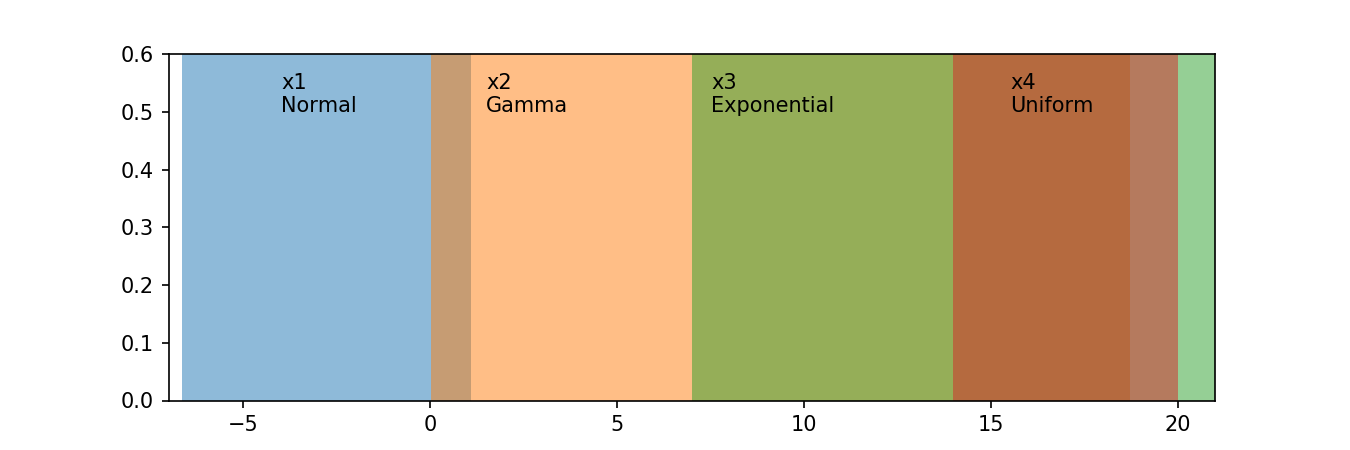

In [5]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, bins=20, alpha=0.5)
plt.hist(x2, bins=20, alpha=0.5)
plt.hist(x3, bins=20, alpha=0.5)
plt.hist(x4, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [6]:
import matplotlib.gridspec as gridspec

In [7]:
import matplotlib.animation as animation
def update(curr):
    
    gspec = gridspec.GridSpec(4, 4)

    n = 500
    x1 = np.random.normal(0, 1, n)
    x2 = np.random.gamma(1, 2, n)
    x3 = np.random.exponential(2, n)
    x4 = np.random.uniform(0,5, n)

    top_left = plt.subplot(gspec[0:2, 0:2])
    top_right = plt.subplot(gspec[0:2, 2:])
    bottom_left = plt.subplot(gspec[2:, 0:2])
    bottom_right = plt.subplot(gspec[2:, 2:])
          
    if curr == n:
        a.event_source.stop()
    top_right.cla()
    top_left.cla()
    bottom_left.cla()
    bottom_right.cla()
    
    bins = 10 + curr
    top_left.hist(x1, density = True, bins=bins, alpha=0.4, color = 'red')
    top_right.hist(x2, density = True, bins=bins, alpha=0.4, color = 'blue')
    bottom_left.hist(x3, density = True, bins=bins, alpha=0.4, color = 'green')
    bottom_right.hist(x4, density = True, bins=bins, alpha=0.4, color = 'yellow')
    
    top_left.set_title('Normal')
    top_right.set_title('Gamma')
    bottom_left.set_title('Exponential')
    bottom_right.set_title('Uniform')  
    
    top_left.set_xticks([])
    top_right.set_xticks([])
    bottom_left.set_xticks([])
    bottom_right.set_xticks([])
    top_left.set_yticks([])
    top_right.set_yticks([])
    bottom_left.set_yticks([])
    bottom_right.set_yticks([])
    
    fig.suptitle('Number of bins : {0}'.format(bins))
    
    plt.tight_layout()


<IPython.core.display.Javascript object>


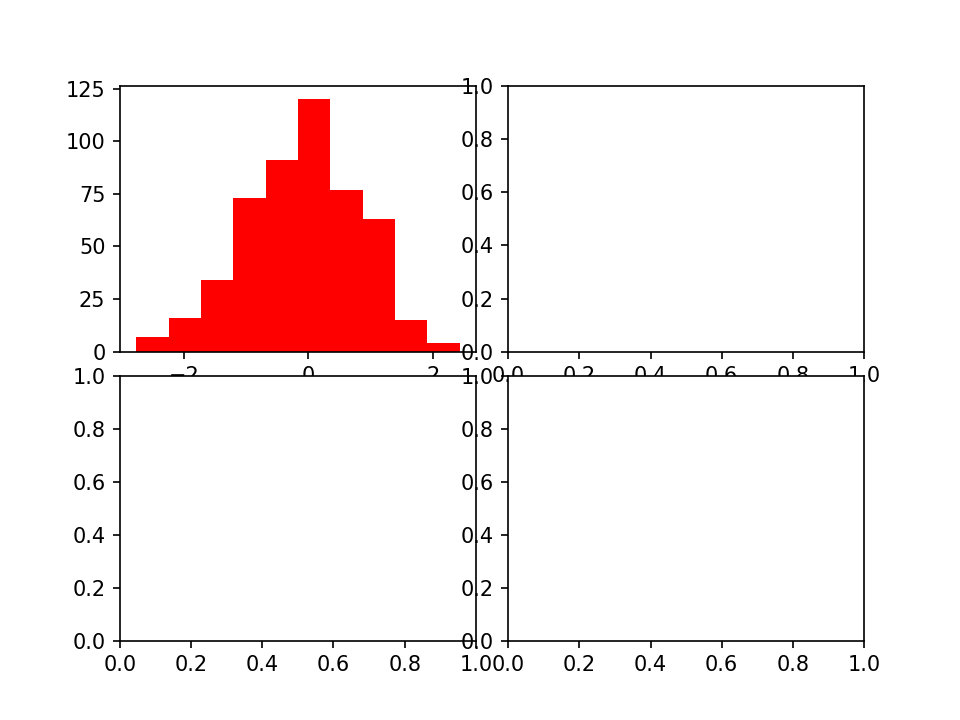

In [8]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=50)